<a href="https://colab.research.google.com/github/evillag/xtol_m5/blob/master/EDA_M5T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Prepare and Explore the Data**
## **Data Science with Python (XTOL - Cenfotec)**
## *Author: Esteban  Villalobos*
## *March 5$^{th}$, 2020*


## Dataset description:
The dataset loaded contains labeled records of Taiwan customers' payment habits over a period of 6 months.

**Source**: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

### **Attribute Information**
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX:
 - 1 = male
 - 2 = female

- EDUCATION: 
 - 1 = graduate school
 - 2 = university
 - 3 = high school
 - 0, 4, 5, 6 = others
- MARRIAGE: 
 - 1 = married
 - 2 = single
 - 3 = divorce
 - 0 =others
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
>
 - PAY_0 = the repayment status in September, 2005
 - PAY_2 = the repayment status in August, 2005
 - . . .
 - PAY_6 = the repayment status in April, 2005.
 
> The measurement scale for the repayment status is:
- -2: No consumption
- -1: Paid in full
- 0: The use of revolving credit
- 1 = payment delay for one month
- 2 = payment delay for two months
- . . .
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above
 
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar):
 - BILL_AMT1 = amount of bill statement in September, 2005
 - BILL_AMT2 = amount of bill statement in August, 2005
 - . . .
 - BILL_AMT6 = amount of bill statement in April, 2005

- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar):
 - PAY_AMT1 = amount paid in September, 2005
 - PAY_AMT2 = amount paid in August, 2005
 - . . .
 - PAY_AMT6 = amount paid in April, 2005

- DEAFULT = *default payment next month*: client's behavior:
 - 0 = then not default
 - 1 = then default

# Import Libraries

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10.0, 8.0]

# Reading Data Set using Pandas

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1, index_col=0)
credit = credit.rename(columns={
    'default payment next month': 'DEFAULT',
    'PAY_0': 'PAY_STATUS_SEP',
    'PAY_2': 'PAY_STATUS_AUG',
    'PAY_3': 'PAY_STATUS_JUL',
    'PAY_4': 'PAY_STATUS_JUN',
    'PAY_5': 'PAY_STATUS_MAY',
    'PAY_6': 'PAY_STATUS_APR',
    'BILL_AMT1': 'BILL_SEP',
    'BILL_AMT2': 'BILL_AUG',
    'BILL_AMT3': 'BILL_JUL',
    'BILL_AMT4': 'BILL_JUN',
    'BILL_AMT5': 'BILL_MAY',
    'BILL_AMT6': 'BILL_APR',
    'PAY_AMT1': 'PAID_SEP',
    'PAY_AMT2': 'PAID_AUG',
    'PAY_AMT3': 'PAID_JUL',
    'PAY_AMT4': 'PAID_JUN',
    'PAY_AMT5': 'PAID_MAY',
    'PAY_AMT6': 'PAID_APR',
})
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Analysis

In [3]:
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null int64
PAY_STATUS_AUG    30000 non-null int64
PAY_STATUS_JUL    30000 non-null int64
PAY_STATUS_JUN    30000 non-null int64
PAY_STATUS_MAY    30000 non-null int64
PAY_STATUS_APR    30000 non-null int64
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_APR          30000 non-null 

In [4]:
# Check if there are null values in the dataset.
credit.isna().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


## Fix column types

In [5]:
credit['SEX'].replace([1,2],['male','female'], inplace=True)
credit['EDUCATION'].replace([0,1,2,3,4,5,6],['other','grad_school','university',
                                             'high_school', 'other',
                                             'other','other'], inplace=True)
credit['MARRIAGE'].replace([0,1,2,3],['other', 'married', 'single', 
                                      'divorce'], inplace=True)

def set_payment_status(df, col):
  df[col].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                  ['no_consumption','paid_in_full','use_revolving_credit',
                   'delay_1m','delay_2m','delay_3m','delay_4m','delay_5m',
                   'delay_6m','delay_7m','delay_8m','delay_9m'], inplace=True)

set_payment_status(credit, 'PAY_STATUS_SEP')
set_payment_status(credit, 'PAY_STATUS_AUG')
set_payment_status(credit, 'PAY_STATUS_JUL')
set_payment_status(credit, 'PAY_STATUS_JUN')
set_payment_status(credit, 'PAY_STATUS_MAY')
set_payment_status(credit, 'PAY_STATUS_APR')

credit['DEFAULT'].replace([0,1],['False','True'], inplace=True)

for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_STATUS_SEP','PAY_STATUS_AUG',
            'PAY_STATUS_JUL','PAY_STATUS_JUN','PAY_STATUS_MAY',
            'PAY_STATUS_APR', 'DEFAULT']:            
            credit[col] = credit[col].astype('category')

credit.sample(25)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
2789,110000,female,university,single,36,delay_1m,paid_in_full,paid_in_full,no_consumption,no_consumption,no_consumption,0,780,0,0,0,0,780,0,0,0,0,0,False
9170,90000,male,high_school,married,31,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,68476,68485,67000,45837,49959,52981,4017,4000,4000,5000,4000,4000,False
21805,120000,female,high_school,single,25,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,106621,105893,107838,103273,101353,87934,4000,5013,4000,3199,3130,4000,True
4634,50000,female,grad_school,single,27,use_revolving_credit,paid_in_full,paid_in_full,paid_in_full,paid_in_full,paid_in_full,13301,1400,780,390,42958,44849,1400,780,390,42958,3500,0,False
26561,50000,female,high_school,single,51,delay_2m,delay_2m,delay_2m,delay_2m,delay_2m,use_revolving_credit,32215,33384,34554,35690,34817,36252,2000,2000,2000,0,2000,2000,False
16142,120000,female,high_school,married,39,delay_1m,delay_2m,delay_2m,delay_2m,delay_2m,delay_2m,69830,68108,70415,74443,75527,77171,0,3400,5800,2900,3000,3100,False
24737,160000,male,university,married,47,paid_in_full,paid_in_full,paid_in_full,paid_in_full,paid_in_full,use_revolving_credit,988,779,637,2667,16746,23591,779,638,2670,16746,7069,7000,False
15620,220000,female,grad_school,single,28,use_revolving_credit,use_revolving_credit,paid_in_full,paid_in_full,paid_in_full,use_revolving_credit,53342,56022,5806,5637,23054,10730,5000,5806,5637,23054,0,2406,False
9492,280000,female,high_school,married,51,no_consumption,no_consumption,no_consumption,no_consumption,no_consumption,no_consumption,2158,0,0,0,0,0,0,0,0,0,0,0,False


In [6]:
# Check fixed column types
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null category
EDUCATION         30000 non-null category
MARRIAGE          30000 non-null category
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null category
PAY_STATUS_AUG    30000 non-null category
PAY_STATUS_JUL    30000 non-null category
PAY_STATUS_JUN    30000 non-null category
PAY_STATUS_MAY    30000 non-null category
PAY_STATUS_APR    30000 non-null category
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
BILL_JUN          30000 non-null int64
BILL_MAY          30000 non-null int64
BILL_APR          30000 non-null int64
PAID_SEP          30000 non-null int64
PAID_AUG          30000 non-null int64
PAID_JUL          30000 non-null int64
PAID_JUN          30000 non-null int64
PAID_MAY          30000 non-null int64
PAID_A

## Review descriptive statistics

In [7]:
credit.describe()

,LIMIT_BAL,AGE,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
credit.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,4,4,11,11,11,11,10,10,2
top,female,university,single,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,False
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


Distribution of Loans limit balance

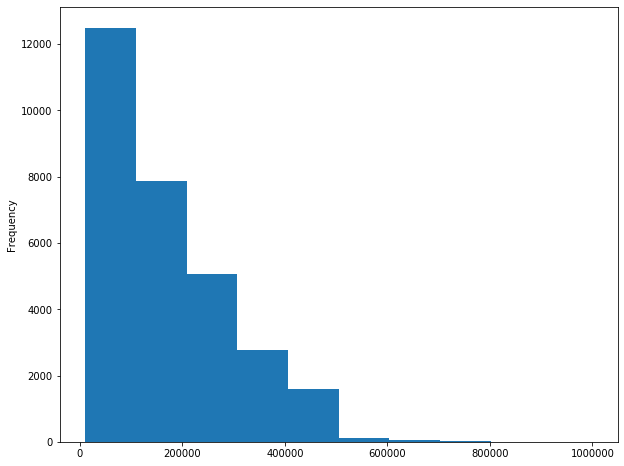

In [9]:
credit['LIMIT_BAL'].plot(kind='hist')

Distribution of data by quantiles:

In [10]:
credit['LIMIT_BAL_QUANTILE'] = pd.qcut(credit['LIMIT_BAL'], q=4, labels=False, precision=0)
credit['AGE_QUANTILE'] = pd.qcut(credit['AGE'], q=4, labels=False, precision=0)
credit[['AGE','AGE_QUANTILE', 'LIMIT_BAL', 'LIMIT_BAL_QUANTILE']].sample(15)

,AGE,AGE_QUANTILE,LIMIT_BAL,LIMIT_BAL_QUANTILE
ID,,,,
2864,37,2,50000,0
8995,30,1,50000,0
18684,27,0,200000,2
13642,24,0,50000,0
28714,37,2,200000,2
8494,30,1,300000,3
3337,31,1,80000,1
15344,31,1,300000,3
22544,47,3,200000,2


Normalize dataframe

Only columns with monetary amounts will be normalized.

In [11]:
normalizable_df = credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL',
                          'BILL_JUN','BILL_MAY','BILL_APR','PAID_SEP',
                          'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
                          'PAID_APR',]]
cred_normalized=((normalizable_df-normalizable_df.min())/(normalizable_df.max()-normalizable_df.min()))*20

cred_normalized.sample(15)

,LIMIT_BAL,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
ID,,,,,,,,,,,,,
9862,4.242424,3.330334,1.777570,1.726892,3.202755,1.612962,6.032382,0.042928,0.000000,0.000000,0.000000,2.479738,3.997231
17364,0.808081,3.766104,2.238172,2.254873,4.181837,2.621683,5.982077,0.045790,0.011875,0.111602,0.000000,0.000000,0.094578
21174,8.484848,2.930065,1.445695,1.823886,3.389382,1.895340,5.366539,0.146711,0.104972,0.222178,0.460064,0.449395,0.984478
25228,1.616162,3.871423,1.700699,1.955733,3.598823,2.024978,5.543182,0.030313,0.015900,0.036561,0.028663,0.035777,0.029092
24323,5.454545,8.165112,7.123529,5.142825,9.104152,4.613284,7.560647,0.343425,0.124351,0.252980,0.322383,0.281341,7.566214
22073,1.414141,5.128861,3.692465,3.108041,5.619761,4.148180,7.197862,0.104722,0.056250,0.128409,0.161031,0.203034,0.164225
17353,0.808081,3.757680,2.174891,2.219921,4.075902,2.550448,5.962804,0.048080,0.024937,0.055801,0.064412,0.093780,0.113493
10184,0.404040,3.330263,1.797557,1.992958,3.707867,2.182161,5.651338,0.068685,0.000000,0.066961,0.074944,0.000000,0.045397
20669,1.010101,3.746919,2.175346,2.252106,4.115691,2.548525,5.949033,0.000000,0.047499,0.044641,0.000000,0.093780,0.064313


Overwrite original columns with normalize data

In [0]:
credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL','BILL_JUN','BILL_MAY',
        'BILL_APR','PAID_SEP','PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
        'PAID_APR']] = cred_normalized

Save to new csv file.

In [0]:
credit.to_csv('normalized_credit_df.csv')

Exploratory Data Analysis

In [14]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_STATUS_SEP',
       'PAY_STATUS_AUG', 'PAY_STATUS_JUL', 'PAY_STATUS_JUN', 'PAY_STATUS_MAY',
       'PAY_STATUS_APR', 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN',
       'BILL_MAY', 'BILL_APR', 'PAID_SEP', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN',
       'PAID_MAY', 'PAID_APR', 'DEFAULT', 'LIMIT_BAL_QUANTILE',
       'AGE_QUANTILE'],
      dtype='object')


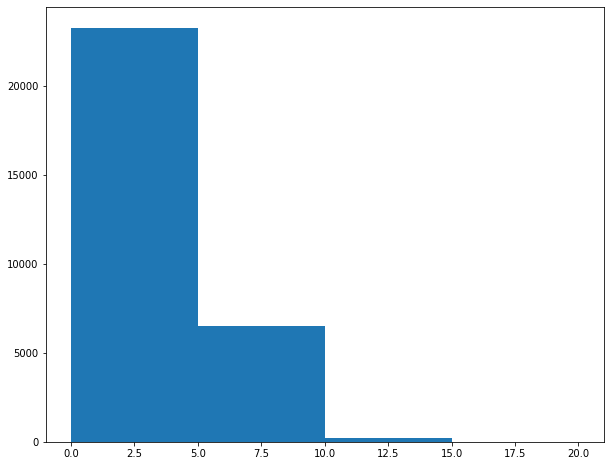

In [15]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

Line Plots

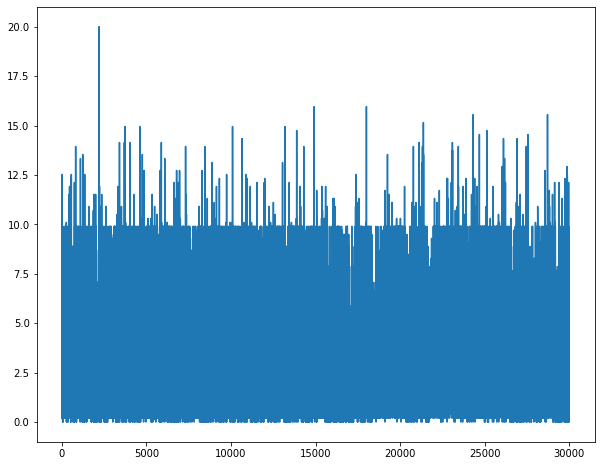

In [16]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

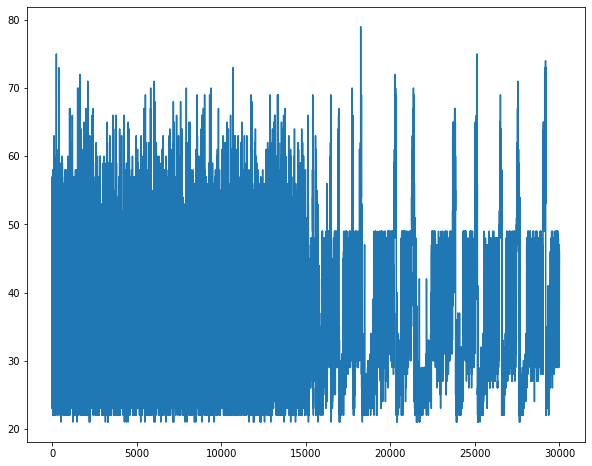

In [17]:
plt.plot(credit[['AGE']])
plt.show()

Scatter plots

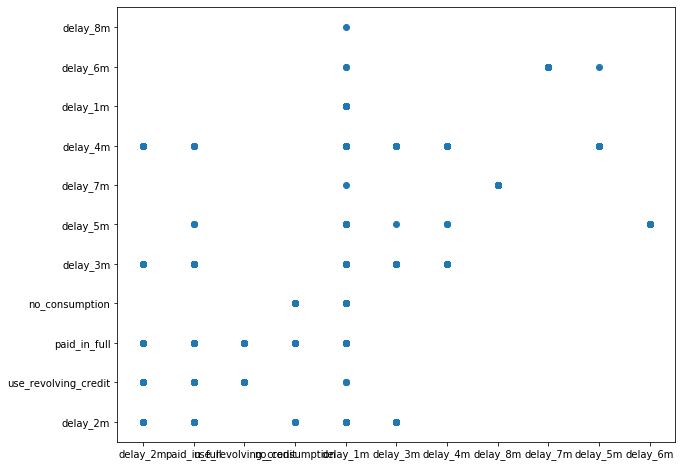

In [18]:
x = credit['PAY_STATUS_SEP']
y = credit['PAY_STATUS_AUG']
plt.scatter(x,y)
plt.show()

 Box Plots

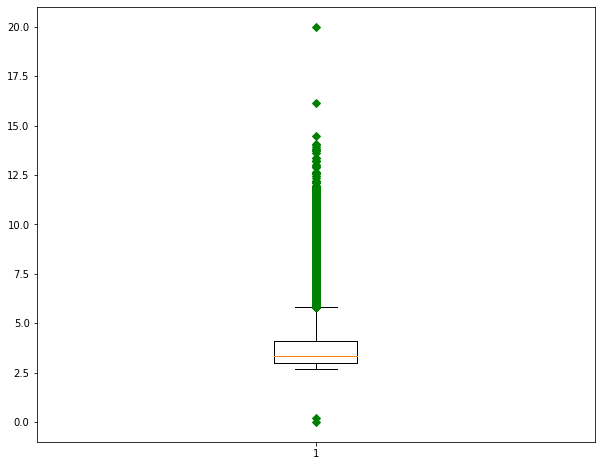

In [20]:
A = credit['BILL_SEP']
plt.boxplot(A,0,'gD')
plt.show()

Correlation matrix

In [21]:
corrMat = credit.corr()
print(corrMat)

                    LIMIT_BAL       AGE  ...  LIMIT_BAL_QUANTILE  AGE_QUANTILE
LIMIT_BAL            1.000000  0.144713  ...            0.908324      0.165363
AGE                  0.144713  1.000000  ...            0.130200      0.927314
BILL_SEP             0.285430  0.056239  ...            0.267842      0.054064
BILL_AUG             0.278314  0.054283  ...            0.261505      0.052472
BILL_JUL             0.283236  0.053710  ...            0.263248      0.051520
BILL_JUN             0.293988  0.051353  ...            0.271807      0.049574
BILL_MAY             0.295562  0.049345  ...            0.274127      0.048227
BILL_APR             0.290389  0.047613  ...            0.268491      0.046494
PAID_SEP             0.195236  0.026147  ...            0.177247      0.031465
PAID_AUG             0.178408  0.021785  ...            0.150264      0.030099
PAID_JUL             0.210167  0.029247  ...            0.176818      0.034151
PAID_JUN             0.203242  0.021379  ...        

Covariance

In [22]:
covMat = credit.cov()
print(covMat)

                    LIMIT_BAL        AGE  ...  LIMIT_BAL_QUANTILE  AGE_QUANTILE
LIMIT_BAL            6.870505   3.496499  ...            2.642665      0.490223
AGE                  3.496499  84.969755  ...            1.332143      9.667614
BILL_SEP             0.974989   0.675573  ...            0.387429      0.079685
BILL_AUG             0.985507   0.675968  ...            0.392118      0.080172
BILL_JUL             0.565355   0.377019  ...            0.222511      0.044372
BILL_JUN             0.933966   0.573729  ...            0.365658      0.067956
BILL_MAY             0.934068   0.548417  ...            0.366854      0.065763
BILL_APR             0.696706   0.401726  ...            0.272780      0.048132
PAID_SEP             0.194063   0.091398  ...            0.074606      0.013495
PAID_AUG             0.127947   0.054942  ...            0.045633      0.009314
PAID_JUL             0.216494   0.105951  ...            0.077130      0.015179
PAID_JUN             0.268788   0.099431